# Goup Number 39
- Karthick Vel Kathirvel (kk37347)
- Manideep Telukuntla (mt39528)

# Assignment 2 #
### Due: Friday, September 22 to be submitted via Canvas by 11:59 pm ###
### Total points: **85** ###

Your homework should be written in a python notebook. If you prefer, you can work in groups of two. For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

### Note that:
###1. Only one student per group needs to submit the assignment on Canvas;
###2. Make sure to include both students' names, UT EIDs and homework group number in your submitted notebook;
###3. Please make sure your code runs, the graphs and figures are displayed in your notebook before submitting. (%matplotlib inline)
### 4. Late submissions receive 0 points.

# Question 1: Bias and Variance (**10 pts**)

(a). (**4 pts**) Describe the difference between model bias and the bias of a point estimator.

(b) (**6 pts**). How can you use a learning curve to determine whether a model is overfitting  (for a given sample size)? Discuss this with respect to the observed train and validation error curves. How does your answer change if the model you are trying to determine is underfitting?

<div style="background-color:#A8D5E2; padding:10px; border:1px solid #91C0D3; border-radius:5px;">

## Answer (a)

### Model Bias

- Model bias quantifies how much the average prediction across the entire input space differs from the true function.
- Model bias tells us how off the mark our model's predictions are, on average, from the true values. A high bias would mean that our model misses the true values by a large margin, making strong assumptions about the form of the target function.

### Bias of a Point Estimator
 
- The bias of a point estimator quantifies how much the expected value of the estimator differs from the true parameter value we're trying to estimate.
- The bias of a point estimator tells us how off our estimate is, on average, from the true parameter value. A biased estimator would systematically overestimate or underestimate the parameter, while an unbiased estimator would be correct on average across many samples.

</div>

<div style="background-color:#A8D5E2; padding:10px; border:1px solid #91C0D3; border-radius:5px;">

## Answer (b)

A **learning curve** displays a model's performance on training and validation datasets over varying training instances. It helps diagnose overfitting, underfitting, or optimal performance.

### Interpretation:

#### 1. Overfitting:
- **Training Error:** Low.
- **Validation Error:** Decreases initially, then plateaus or rises.
- **Gap:** Significant, indicating poor generalization to unseen data.

#### 2. Underfitting:
- **Training Error:** Consistently high.
- **Validation Error:** Remains high.
- **Gap:** Small, indicating poor performance on both datasets.

#### 3. Good Fit:
- **Training Error:** Starts low, may increase slightly.
- **Validation Error:** Decreases and stabilizes at a low value.
- **Gap:** Minimal, indicating good generalization.

### Recommendations:

- **Overfitting:** Consider more training data, model simplification, or regularization.
- **Underfitting:** Increase model complexity or add features.

</div>

# Question 2: Bias-Variance Exploration (**20 points**)
Consider a function $g$ such that $g(x)=2sin(\pi
x)cos(3\pi x^2)$. We will try to fit this function using a simple (binning based) piecewise constant function with varying number of bins. Here the number of bins controls the model complexity.

Note: problem below uses the statistics notation: target is y and your estimates are $y_{hat}$.


a) (2 points) Generate a dataset $(D = X,Y)$ by generating a set of 1-dimensional x's and y's in the following way -
*  $x_i = \frac{i}{2000}$ for each $i$ in $1, 2, 3 \ldots 2000$.
* Then, for each of the $x_i$'s obtain $y_i = 2sin(\pi x_i)cos(3\pi x_i^2)+ N(0,1)$ where $N(0,1)$ denotes the normal distribution with mean 0 and variance 1.

Create 10 such datasets by independently repeating the entire process 10 times. Plot any one of the generated datasets.

In [1]:
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
def generate_data(num_points):
  x = np.arange(1, num_points + 1) / num_points
  ### START CODE ###
  # Compute y according to the labeling function g
  y = 2 * np.sin(np.pi * x) * np.cos(3 * np.pi * x**2) + np.random.normal(0, 1, num_points)
  ### END CODE ###
  return x,y

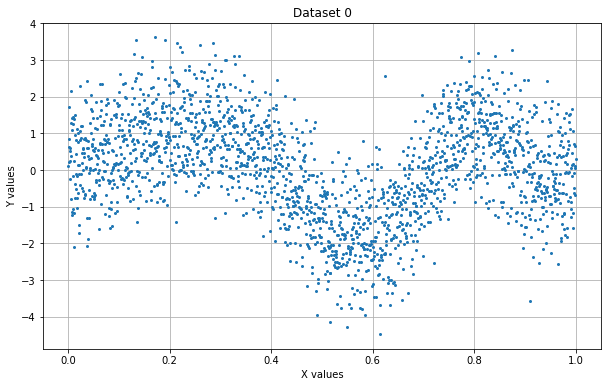

In [5]:
datasets = {}
for j in range(10):
  datasets[j] = {}
  datasets[j]['X'], datasets[j]['Y'] = generate_data(2000)

### START CODE ###
# Plot y v.s. x of any one of the dataset
plt.figure(figsize=(10,6))
plt.plot(datasets[0]['X'], datasets[0]['Y'], '.', markersize=4)
plt.title("Dataset 0")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.grid(True)
plt.show()
### END CODE ###


b) (5 points) Consider an estimator of function $g$, $f(x)$ that divides the x's into $K$ bins such that there are $m = n/K$ data points in each bin and the predicted y for all points in that bin is the mean of all the $y$'s in the bin.
$$
f(x) = \sum_{j=1}^{K} \bar{y}_j \mathbb{1}(x \in \text{bin } j)
$$
where
$$
\bar{y}_j = \frac{1}{m}\sum_{i=j*m}^{(j+1)*m-1} y_i.
$$
Implement this estimator. Obtain $Y_{hat} = f(x)$ for one of the datasets created above by using $K=25$ and plot the predicted $Y_{hat}$ along with $X$ and $Y$.



In [15]:
### START CODE ###
# Implement Estimator
def piecewise_constant_estimator(X, Y, K):
    # Determine the number of points in each bin
    m = len(X) // K
    
    # Placeholder for the predicted values
    Y_hat = np.zeros_like(Y)
    
    for j in range(K):
        # Indices for the start and end of the j-th bin
        start_idx = j * m
        end_idx = (j + 1) * m
        
        # Calculate the mean y for the j-th bin
        y_bar_j = np.mean(Y[start_idx:end_idx])
        
        # Assign the mean y to all data points in the bin
        Y_hat[start_idx:end_idx] = y_bar_j
    
    return Y_hat
### END CODE ###

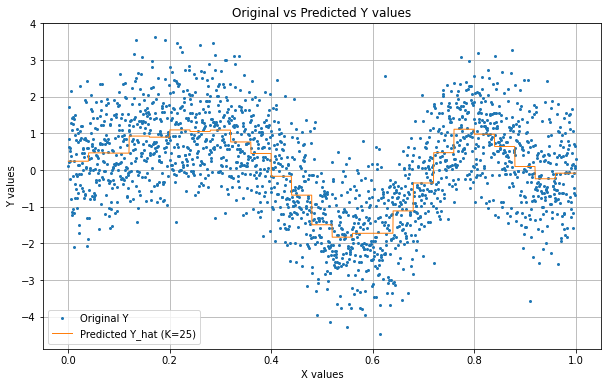

In [16]:
### START CODE ###
# Plot predicted y_{hat} along with X and Y
# Use the estimator on the first dataset with K=25
K = 25
Y_hat = piecewise_constant_estimator(datasets[0]['X'], datasets[0]['Y'], K)

# Plot the original Y and the predicted Y_hat values against X
plt.figure(figsize=(10,6))
plt.plot(datasets[0]['X'], datasets[0]['Y'], '.', markersize=4, label="Original Y")
plt.plot(datasets[0]['X'], Y_hat, '-', linewidth=1, label=f"Predicted Y_hat (K={K})")
plt.title("Original vs Predicted Y values")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend()
plt.grid(True)
plt.show()
### END CODE ###

c) (3 points) What do you think will happen to the MSE, the bias and the variance as the number of bins $K$ is increased?
<div style="background-color:#A8D5E2; padding:10px; border:1px solid #91C0D3; border-radius:5px;">
    
As K is increased, since the model becomes more flexible:
- Bias decreases.
- Variance increases.
- Initially, MSE might decrease, but after a point, it might increase due to overfitting.

</div>


d) (5 points) For each dataset, vary the number of bins $K \in \{2,5,10,25,50,100,250, 500, 1000\}$ and obtain the predictions. Also, for any one of the datasets (your choice), compute and plot the MSE obtained with varying $K$.

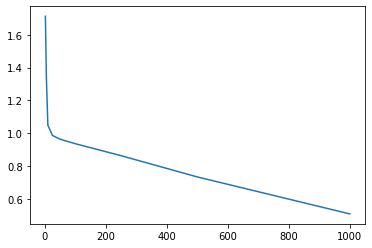

In [17]:
mse_scores = []
K = [2,5,10,25,50,100,250,500,1000]
for n in K:
    ### START CODE ###
    # For the chosen dataset, compute y_hat
    Y_hat = piecewise_constant_estimator(datasets[0]['X'], datasets[0]['Y'], n)
    ### END CODE ###

    ### START CODE ###
    # Compute MSE
    mse = mean_squared_error(datasets[0]['Y'], Y_hat)
    ### END CODE ###
    mse_scores.append(mse)
    
plt.plot(K,mse_scores)
plt.show()

e) (5 points) Recall the definitions of the bias and variance, and now given the predictions obtained from 10 different datasets, compute the (sample) bias and variance of the model for each of the $K \in \{2,5,10,25,50,100,250,500,1000\}$ and plot $K$  bias-squared vs $K$ and variance vs. $K$  on the same plot.
We are using the term "sample" to remember that bias/variance are "expected quantities" that we are approximating by considering only 10 models, one per dataset.

If y_pred denotes the 2000 x 10 2-D matrix of estimates for 2000 data points and obtained by the function estimated from the 10 datasets, use the following code to obtain the sample bias and variance.

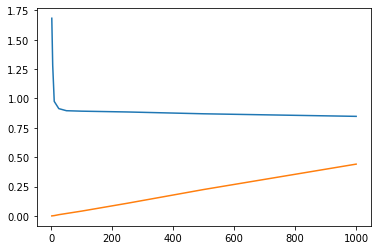

In [18]:
bias_vals = []
var_vals = []
K = [2,5,10,25,50,100,250,500,1000]
pred_y = np.zeros((len(datasets[0]['Y']),10)) # axis 0: number of data points, axis 1: number of datasets (10)

for n in K:
  for j in datasets.keys():
    x = datasets[j]['X']
    y = datasets[j]['Y']
    ### START CODE ###
    # Estimate y_{hat}
    y_hat = piecewise_constant_estimator(x, y, n)
    ### END CODE ###
    pred_y[:,j] = y_hat

  ### START CODE ###
  # Compute the mean of the estimates over 10 datasets for each input x_{i}
  avg_yhat = np.mean(pred_y, axis=1) # 1D array of shape (2000,)
  # Compute the MSE between avg_yhat and y as bias
  bias = np.mean((avg_yhat - y)**2)
  # Compute the variance of the estimates over 10 datasets for each input x_{i}, then average over all inputs
  var_yhat = np.mean(np.var(pred_y, axis=1))
  ### END CODE ###
  bias_vals.append(bias)
  var_vals.append(var_yhat)
    
plt.plot(K, bias_vals)
plt.plot(K, var_vals)
plt.show()

# Question 3: Stochastic Gradient Descent Improvements (**10 pts**)

## Part 1. (**5 pts**) ##
Read this [blog](https://medium.com/optimization-algorithms-for-deep-neural-networks/gradient-descent-with-momentum-dce805cd8de8) on medium and describe in your own words how momentum leads to a faster convergence of the loss function.


<div style="background-color:#A8D5E2; padding:10px; border:1px solid #91C0D3; border-radius:5px;">

Momentum in Gradient Descent:
- Acts like a ball rolling downhill, gathering speed as it moves.
- Helps the algorithm avoid getting stuck or moving slowly.

How it Works:
- Uses not just the current gradient, but also an average of past gradients.
- This "memory" of past speeds pushes the algorithm faster towards the optimal point.

Benefits:
- Reduces oscillations in the path.
- Takes a more direct path to the optimal solution.
- Ensures faster and smoother convergence.

</div>

## Part 2. (**5 pts**) ##
Read this [blog](https://sweta-nit.medium.com/batch-mini-batch-and-stochastic-gradient-descent-e9bc4cacd461) on medium and explain in your own words the advantages of Mini-batch Stochastic Gradient Descent.


<div style="background-color:#A8D5E2; padding:10px; border:1px solid #91C0D3; border-radius:5px;">
    
<b>Frequent Model Updates:</b> 
-    Unlike Batch Gradient Descent (BGD) that waits for the entire dataset, MGD updates the model more frequently by using smaller batches of data.

<b>Efficient Memory Usage:</b> 
-    By processing data in small batches, MGD doesn't require all training data to be loaded into memory. This makes it memory-efficient.

<b>Faster Training:</b> 
-    Since weights are updated after each mini-batch, the network typically trains faster with MGD than with BGD.

<b>Balanced Approach:</b> 
-    MGD strikes a balance between the computational efficiency of BGD and the frequent updates of Stochastic Gradient Descent (SGD).

<b>Less Oscillation than SGD:</b> 
-    While SGD can have significant oscillations due to updates for each data point, MGD reduces this by averaging over a mini-batch.

<b>Adaptive Learning:</b> 
-    MGD allows for adjustments in the learning rate, which can be beneficial for convergence.

</div>

# Question 4: Stochastic Gradient Descent (30 pts)

## Part 1. (**10 pts**) Stochastic gradient descent derivation ##

Use stochastic gradient descent to derive the coefficent updates (assuming squared loss is being used as the cost function) for the 4 coefficients $w_0, w_1, w_2, w_3$ in this model：

$$ y = w_0 + w_1e^{-x_1} + w_2 x_1 + w_3x_1x_2 $$




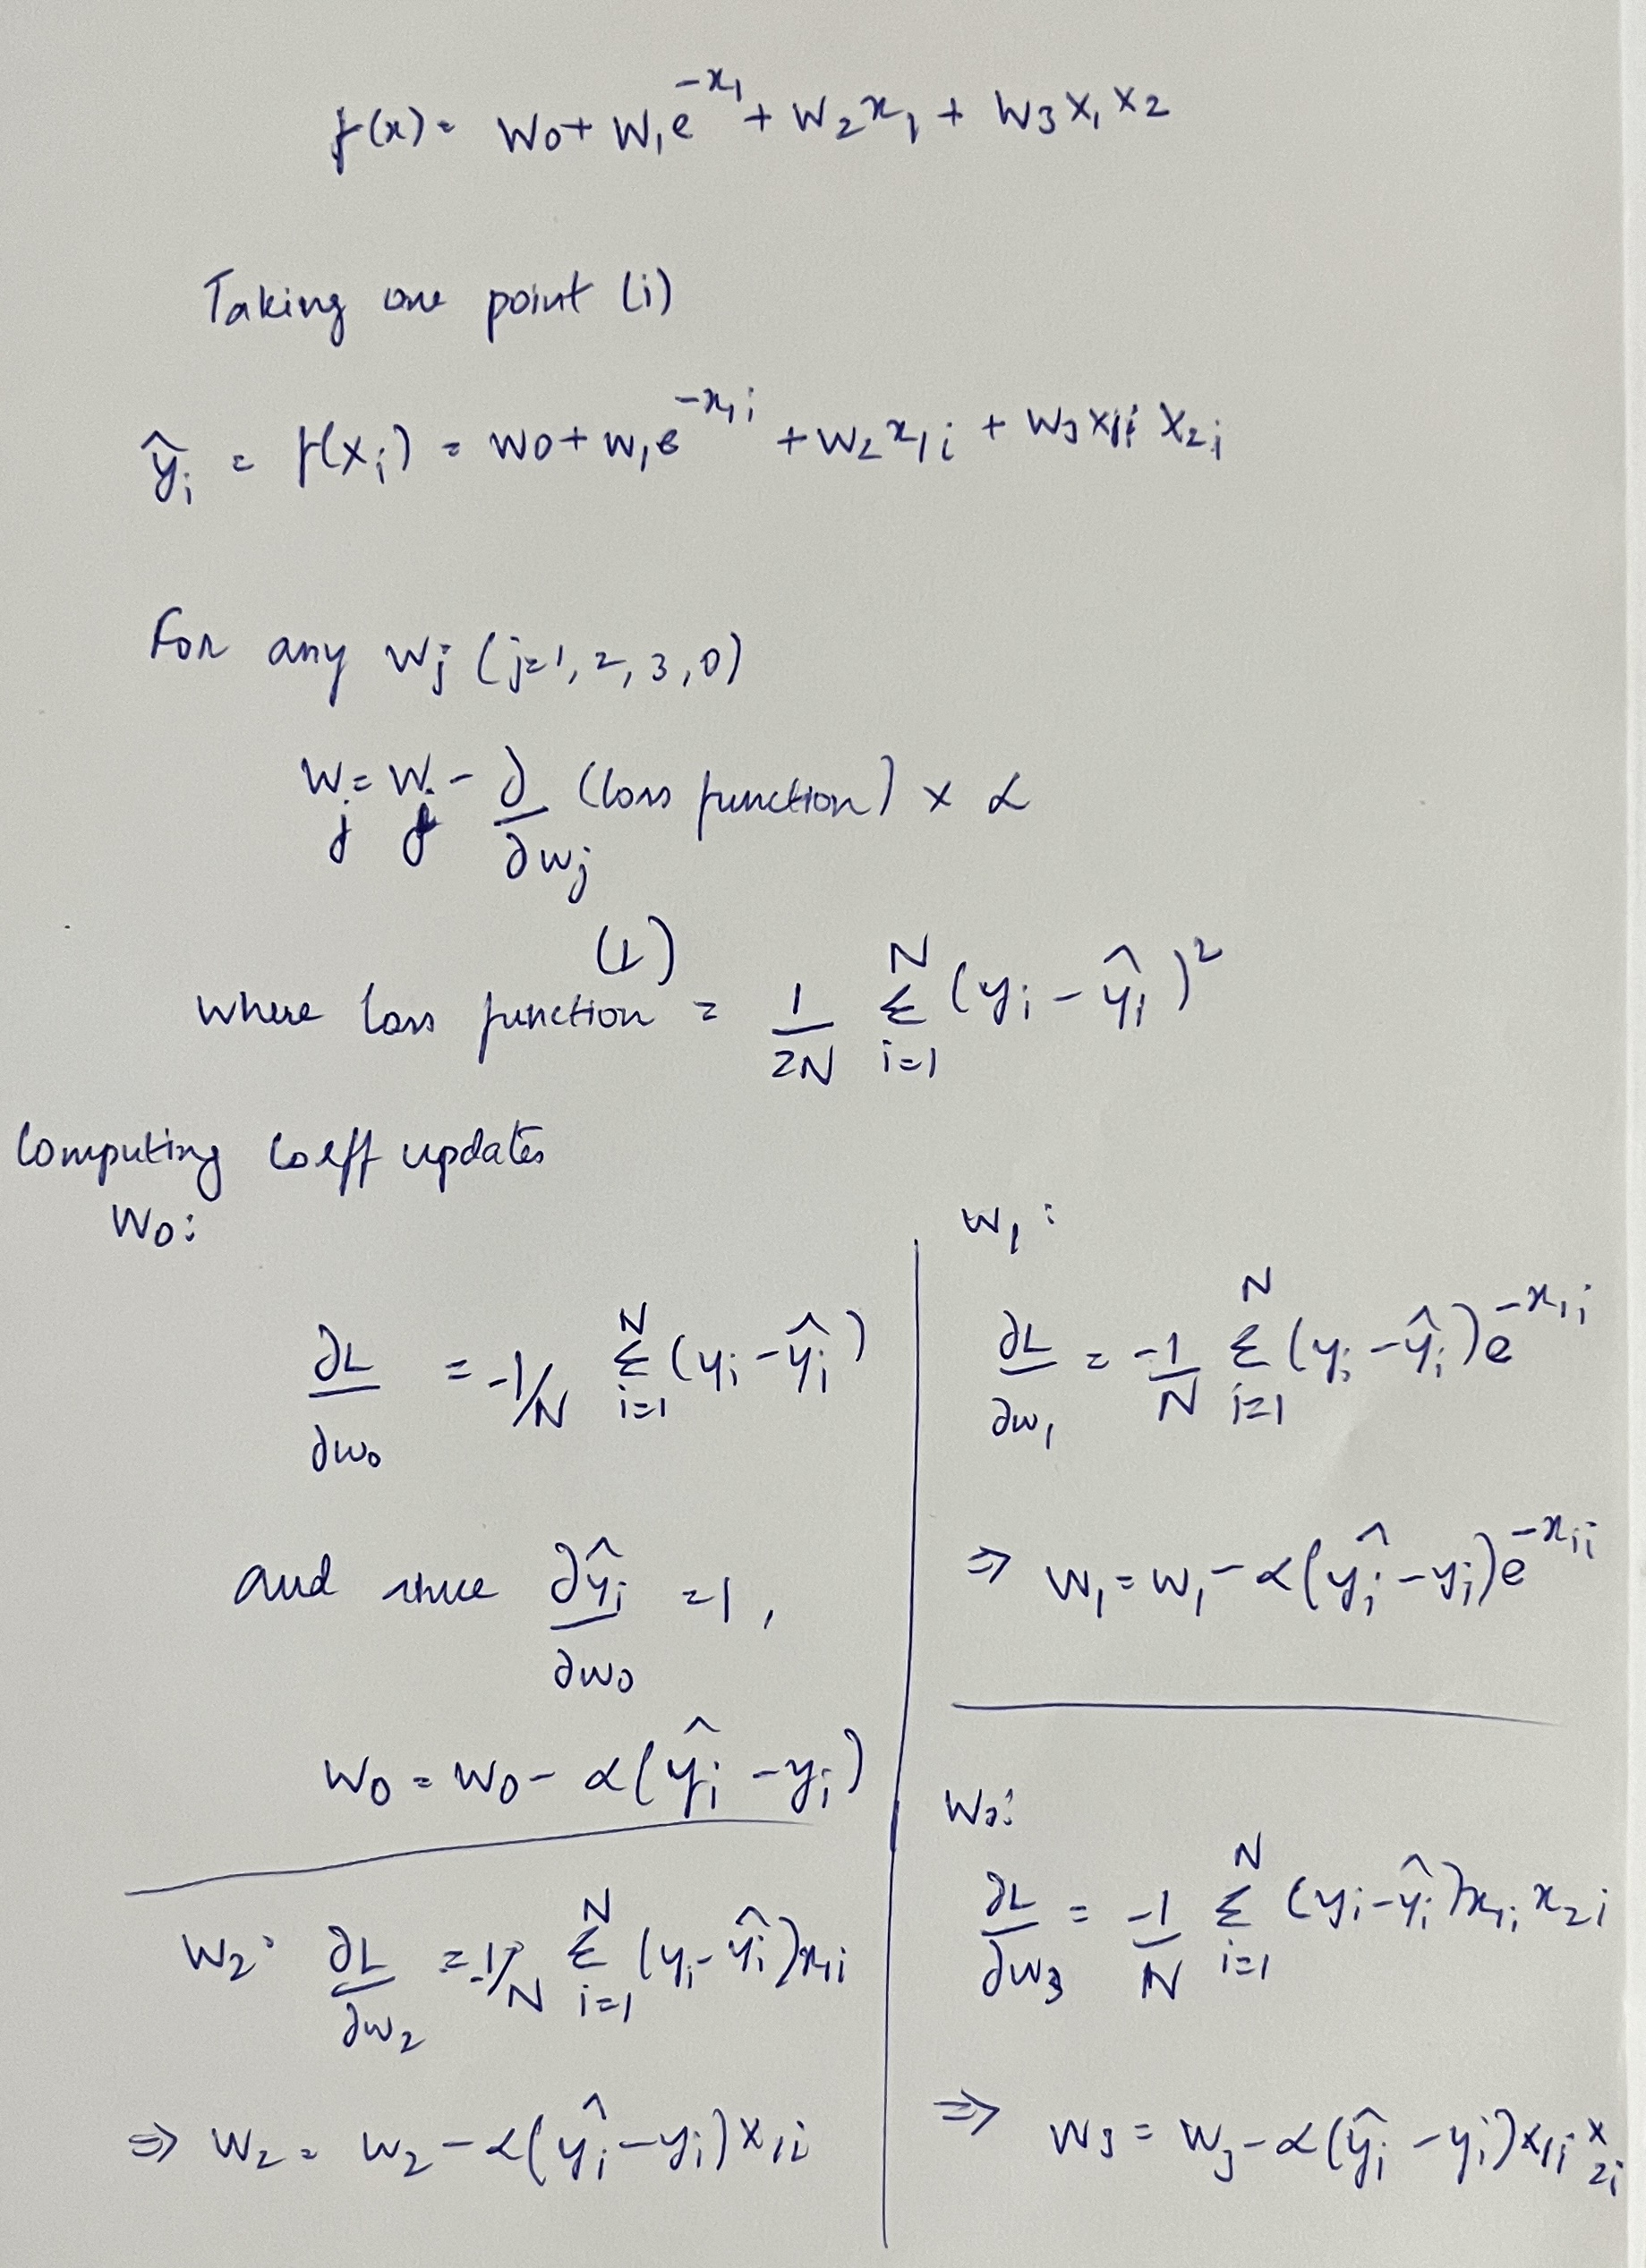

## Part 2. (**20 pts**) Stochastic gradient descent coding ##

Code an SGD solution in Python for this non-linear model$$ y = w_0 + w_1e^{-x_1} + w_2x_1 + w_3x_1x_2 $$  The template of the solution class is given. The init function of the class takes as input the learning rate, regularization constant and number of epochs. The fit method must take as input X, y. The predict method takes an X value (optionally, an array of values).

a) (**15 pts**) Use the expression derived in part 1 to predict the data given in 'SGD_samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100]. For the best 2 combinations of learning_rate and regularization for SGD, plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) .

b) (**5 pts**) Report the MSE of the two best combinations of learning rate and regularization constant.

In [ ]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file.
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

In [5]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

class Regression:

    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        # initialize whichever variables you would need here
        self.coef = np.zeros(4)

    def sgd(self, gradient):
        # Update the self.coef using SGD
        ### START CODE ###
        self.coef = self.coef - self.learning_rate * (gradient + self.regularization * self.coef)
        ### END CODE ###

    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
                ### START CODE ###
                error = y[i] - self.linearPredict(X[i,:])
                ### END CODE ###
                # Compute gradients
                ### START CODE ###
                gradient = - error * X[i,:]
                ### END CODE ###

                # Update weights
                ### START CODE ###
                self.sgd(gradient)
                ### END CODE ###

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)
            mse.append(np.mean(residuals**2))

        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = np.exp(-X[:,0])
        x[:,2] = X[:,0]
        x[:,3] = X[:,0]*X[:,1]

        return x

    def linearPredict(self, X):
        # Compute the dot product of self.coef and X
        ### START CODE ###
        return np.dot(X, self.coef)
        ### END CODE ###

In [6]:
data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

In [7]:
data

,x1,x2,y
0,0.180270,0.038950,0.256735
1,0.724934,0.840407,0.243037
2,0.012781,0.974743,0.435229
3,0.850795,1.459929,-0.059352
4,0.893904,1.714308,-0.116806
...,...,...,...
495,0.158815,1.190632,0.407066
496,0.896116,0.788759,0.142174
497,0.579004,1.126626,0.326487
498,0.081799,1.423595,0.339668


In [8]:
# Iterate through all combinations of learning rates and regularization strength
# Use your Regression class to fit the data and record MSEs
### START CODE ###
output = []
for lr in learning_rate:
  for reg in regularization:
    model = Regression(lr, reg, n_epochs)
    model.fit(X, y)
    output.append({'learning_rate': lr, 'regularization': reg, 'MSE': model.lowest_mse})
### END CODE ###

In [9]:
pd.DataFrame(output)

,learning_rate,regularization,MSE
0,0.0001,0,0.036821
1,0.0001,10,0.056126
2,0.0001,100,0.063636
3,0.0010,0,0.030496
4,0.0010,10,0.056034
5,0.0010,100,0.063492
6,0.0100,0,0.027391
7,0.0100,10,0.054626
8,0.0100,100,0.063437
9,0.1000,0,0.030988


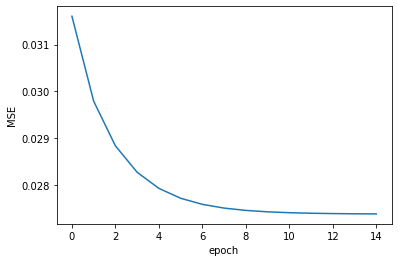

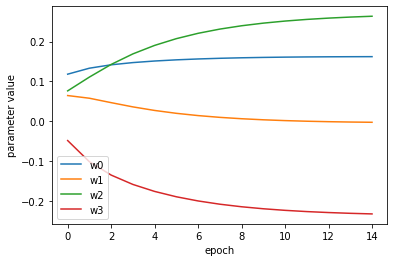

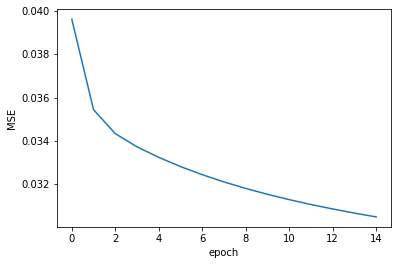

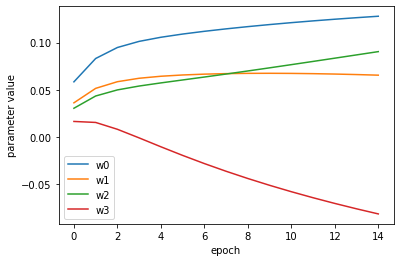

In [13]:
# For the best two combinations, use the plot option in Regression.fit() to plot MSE and parameters as a function of epoch (15 epochs)
### START CODE ###
output.sort(key=lambda x: x['MSE'])
best_two_combinations = pd.DataFrame(output)[:2]

for i in range(2):
  model = Regression(best_two_combinations['learning_rate'][i], best_two_combinations['regularization'][i], n_epochs)
  model.fit(X, y, plot=True)
### END CODE ###

In [14]:
best_two_combinations

,learning_rate,regularization,MSE
0,0.010,0,0.027391
1,0.001,0,0.030496


# Question 5: Visualizing Gradient Descent (**15 pts**) #

## Part 1. **(10 pts)** Coding ##

In this exercise, you are going to visualize four batch update steps of gradient descent for a  linear regression model with two parameters (i.e. weights, indicated by $\theta$).

The true target function is $t = \theta_{0} + \theta_{1}x$ with $\theta_{0}=2$ and $\theta_{1}=0.5$.

Try the following two initializations:
* $\theta_{0}=0$ and $\theta_{1}=0$
* $\theta_{0}=0$ and $\theta_{1}=-4$

and try the following three learning rates:
* 0.5
* 1
* 2.1

Therefore, there will be **six** combinations or settings to consider in total. For each setting, you will plot (a) the data and the changing linear regression fit and (b) the model parameters moving in the weight space after every update.

In [15]:
# Generate data
np.random.seed(42)
m = 20
theta0_true = 2
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta0_true + theta1_true * x + np.random.normal(0, 0.2, size=x.shape)

In [16]:
def loss_func(theta0, theta1):
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    return np.average((y - model(x, theta0, theta1))**2, axis=2)/2

def model(x, theta0, theta1):
    return theta0 + theta1 * x

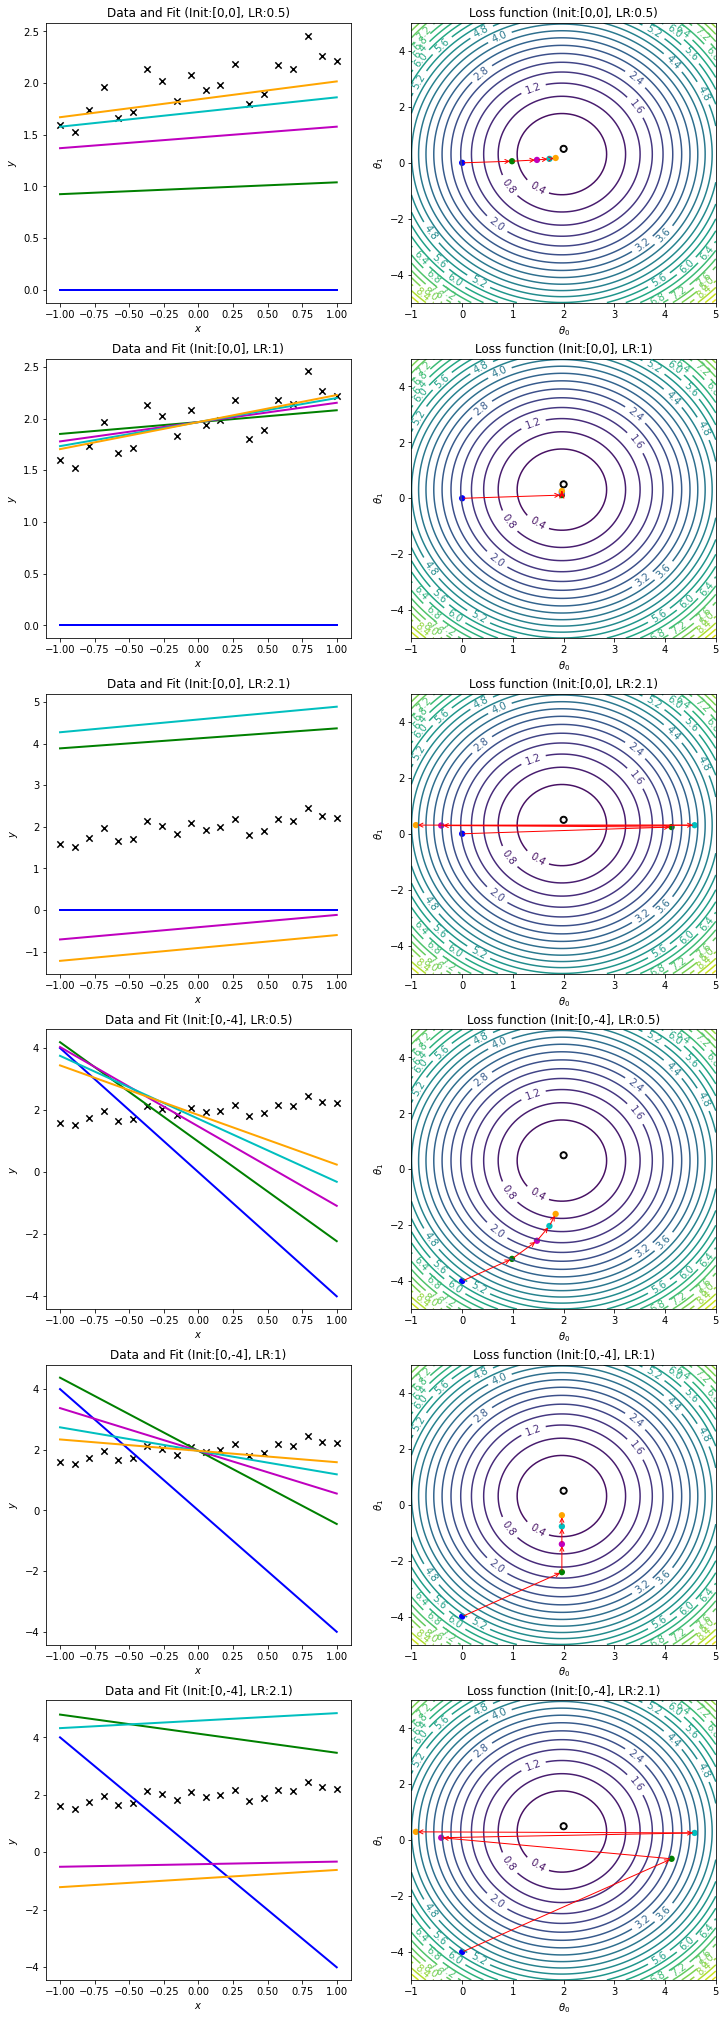

In [17]:
# Experiment with different initialization and learning rate combinations
### START CODE ###
init_list = [(0, 0), (0, -4)]
lr_list = [0.5, 1, 2.1]
### END CODE ###

# Left column shows the data and the changing linear regression models
# Right column shows the model parameters moving over the loss landscape
fig, ax = plt.subplots(nrows=len(init_list) * len(lr_list), ncols=2, figsize=(12, 36))

for i, init in enumerate(init_list):
    for j, lr in enumerate(lr_list):
        row_idx = i * len(lr_list) + j
        ax[row_idx][0].scatter(x, y, marker='x', s=40, color='k')
        theta0_grid = np.linspace(-1,5,101)
        theta1_grid = np.linspace(-5,5,101)
        L_grid = loss_func(theta0_grid[np.newaxis,:,np.newaxis],
                           theta1_grid[:,np.newaxis,np.newaxis])

        # A labeled contour plot for the right column
        X, Y = np.meshgrid(theta0_grid, theta1_grid)
        contours = ax[row_idx][1].contour(X, Y, L_grid, 30)
        ax[row_idx][1].clabel(contours)
        # The target parameter values indicated on the loss function contour plot
        ax[row_idx][1].scatter([theta0_true]*2,[theta1_true]*2,s=[50,10], color=['k','w'])

        # Take N = 4 steps with learning rate alpha down the steepest gradient, starting at init
        N = 4
        theta = [init] # placeholder list for storing historical parameters
        L = [loss_func(*theta[0])[0]] # placeholder list for storing historical loss values
        for _ in range(N):
            last_theta = theta[-1]
            this_theta = np.empty((2,))
            # Update theta
            ### START CODE ### (2 lines of code)
            this_theta[0] = last_theta[0] - lr * (-np.mean(y - model(x, last_theta[0], last_theta[1])))
            this_theta[1] = last_theta[1] - lr * (-np.mean((y - model(x, last_theta[0], last_theta[1])) * x))
            ### END CODE ###
            theta.append(this_theta)
            L.append(loss_func(*this_theta))

        # Annotate the loss function plot with coloured points indicating the
        # parameters chosen and red arrows indicating the steps down the gradient.
        # Also plot the fit function on the LHS data plot in a matching colour.
        colors = ['b', 'g', 'm', 'c', 'orange']
        ax[row_idx][0].plot(x, model(x, *theta[0]), color=colors[0], lw=2,
                   label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[0]))
        for k in range(1,N+1):
            ax[row_idx][1].annotate('', xy=theta[k], xytext=theta[k-1],
                           arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                           va='center', ha='center')
            ax[row_idx][0].plot(x, model(x, *theta[k]), color=colors[k], lw=2,
                   label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[k]))
        ax[row_idx][1].scatter(*zip(*theta), c=colors, s=40, lw=0)

        # Labels and titles.
        ax[row_idx][1].set_xlabel(r'$\theta_0$')
        ax[row_idx][1].set_ylabel(r'$\theta_1$')
        ax[row_idx][1].set_title(f'Loss function (Init:[{init[0]},{init[1]}], LR:{lr})')
        ax[row_idx][0].set_xlabel(r'$x$')
        ax[row_idx][0].set_ylabel(r'$y$')
        ax[row_idx][0].set_title(f'Data and Fit (Init:[{init[0]},{init[1]}], LR:{lr})')
        axbox = ax[row_idx][0].get_position()

plt.show()

## Part 2. **(5 pts)** ##
For the experiment above, briefly summarize what you observed about the impact of (i) initialization and (ii) learning rate, on the evolution of the model parameters.

<div style="background-color:#A8D5E2; padding:10px; border:1px solid #91C0D3; border-radius:5px;">

## Analysis of Initialization and Learning Rate

Initialization and learning rate are two crucial factors that influence how quickly a model can reach the local minima of an error surface. If the learning rate is too small and the initialization is far from the local minima, it will require many more steps to reach the minima. Conversely, if the learning rate is too high, the model might overshoot and never converge to the local minima, oscillating around the error surface.

### Experiment Observations:

#### 1. Initialization: [0,0], Learning Rate: 0.5
- Although it seems to be approaching the minima, it hasn't quite reached it.
- This setup requires more iterations to reach the local minima.
- The data fit isn't optimal, suggesting that increasing the learning rate slightly might help.

#### 2. Initialization: [0,0], Learning Rate: 1
- This setup took fewer steps compared to the previous one and nearly reached the local minima.
- Resulted in a better data fit.
- It's essential to be cautious about increasing the learning rate excessively.

#### 3. Initialization: [0,0], Learning Rate: 2.1
- This setup underscores the pitfalls of an excessively high learning rate.
- It struggles to converge to the local minima, leading to significant errors and a poor data fit.

#### 4. Initialization: [0,-4], Learning Rate: 0.5
- Due to the initialization being far from the local minima and a small learning rate, this setup doesn't reach the minima within the given iterations.
- Although the data fit isn't ideal, the weights are moving in the correct direction.

#### 5. Initialization: [0,-4], Learning Rate: 1
- This setup is closer to the local minima than the previous one but hasn't reached it.
- The data fit is better than before, but it's still not optimal.
- When initialization is distant from the local minima, there's more flexibility with the learning rate.

#### 6. Initialization: [0,-4], Learning Rate: 2.1
- Even with a distant initialization, an excessively high learning rate can be problematic.
- This setup illustrates that while there's more leeway with the learning rate when initialization is far from the minima, it's still possible to overshoot with an overly high rate.

### Conclusion:

Determining the optimal initialization and learning rate often involves trial and error, testing various combinations. It's also worth noting that as the gradient approaches the local minima, the step size diminishes because the slope becomes flatter, indicating potential convergence to a local minima. However, complex error surfaces with multiple local minima can complicate this process.

</div>